In [5]:
import face_recognition
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [8]:
known_face_encodings = []
known_face_names = []

known_faces_dir = 'known_faces'

for filename in os.listdir(known_faces_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        image_path = os.path.join(known_faces_dir, filename)
        image = face_recognition.load_image_file(image_path)
        encodings = face_recognition.face_encodings(image)

        if len(encodings) > 0:
            known_face_encodings.append(encodings[0])
            known_face_names.append(os.path.splitext(filename)[0])
        else:
            print(f"No face found in {filename}")

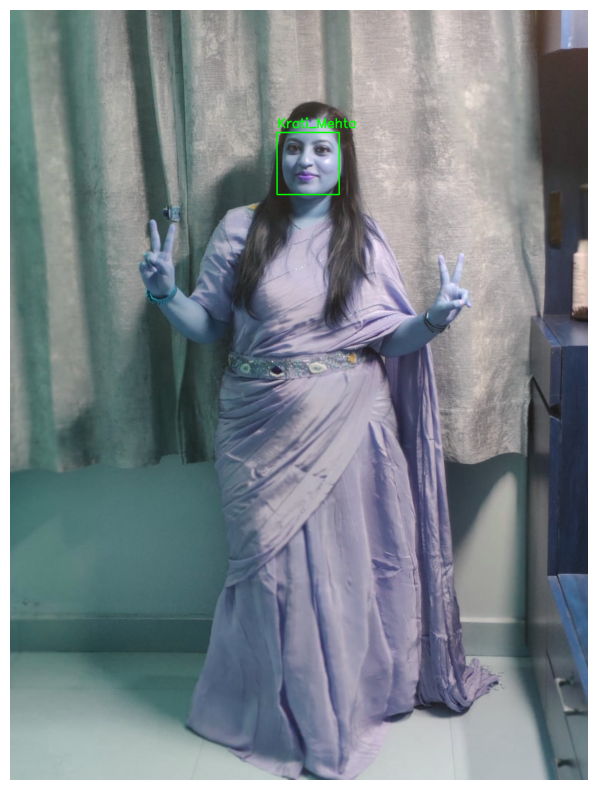

In [10]:
test_image_path = 'uploads/test2.jpeg'  # Replace with your test file
test_image = face_recognition.load_image_file(test_image_path)

# Detect faces
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

# Convert image to RGB for display with matplotlib
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Draw results
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    if len(face_distances) > 0:
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

    # Draw rectangle and label
    cv2.rectangle(test_image_rgb, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(test_image_rgb, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Show the image
plt.figure(figsize=(10, 10))
plt.imshow(test_image_rgb)
plt.axis('off')
plt.show()